In [58]:
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas

In [59]:
df = pandas.read_csv('results/combined-results.csv', sep = '\t')
df

,Python Raw Time,Python Raw Energy (Joules),IO500 Raw Time,IO500 Raw Energy (Joules),TPCC Raw Time,TPCC Raw Energy (Joules),Noop Raw Time,Noop Raw Energy (Joules),Time (Minute),Python Energy per Minute,IO500 Energy per Minute,TPCC Energy per Minute,Noop Energy per Minute
0,12:47:46,1.11,17:40:31,0.77,20:09:42,0.89,12:30:54,1.07,0.0,174.32,207.98,215.22,4.86
1,12:47:47,0.92,17:40:32,0.48,20:09:43,0.50,12:30:55,0.63,1.0,1107.02,463.90,777.18,46.96
2,12:47:48,13.52,17:40:33,10.49,20:09:44,15.61,12:30:56,0.71,2.0,1019.38,461.04,688.59,28.07
3,12:47:49,11.34,17:40:34,15.71,20:09:45,15.70,12:30:57,0.43,3.0,1039.86,419.70,408.29,27.04
4,12:47:50,11.78,17:40:35,18.54,20:09:46,8.61,12:30:58,0.59,4.0,1072.29,449.95,539.91,29.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12474,NaN,NaN,NaN,NaN,23:37:38,6.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12475,NaN,NaN,NaN,NaN,23:37:39,5.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12476,NaN,NaN,NaN,NaN,23:37:40,5.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12477,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
python_color = '#1f77b4'
io500_color = '#ff7f0e'
tpcc_color = '#2ca02c'
noop_color = '#d62728'

In [61]:
def get_workload_style_map(workloads):
    base_colors = [python_color, io500_color, tpcc_color, noop_color]
    markers = ["o", "s", "^", "D"]
    style_map = {}

    for i, wl in enumerate(workloads):
        style_map[wl] = {
            "color": base_colors[i % len(base_colors)],
            "marker": markers[i % len(markers)],
        }

    return style_map

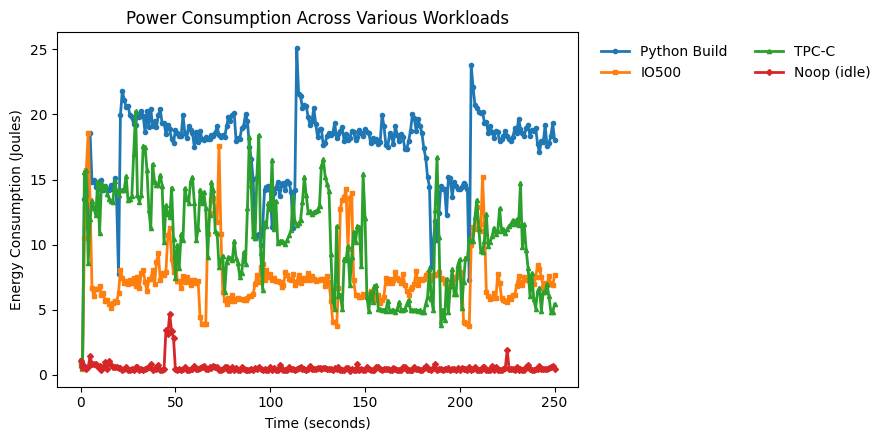

In [67]:
cols = ["Python Raw Energy (Joules)", "IO500 Raw Energy (Joules)", "TPCC Raw Energy (Joules)", "Noop Raw Energy (Joules)"]

# Legend labels
labels = ["Python Build", "IO500", "TPC-C", "Noop (idle)"]

style_map = get_workload_style_map(cols)

# Line Chart: Seconds
fig, ax = plt.subplots(figsize=(9, 4.5))

df_plot = df.iloc[:251]
x = np.arange(len(df_plot))

for col, label in zip(cols, labels):
    style = style_map[col]
    ax.plot(
        x,
        df_plot[col],
        label=label,
        color=style["color"],
        marker=style["marker"],
        markevery=1,
        markersize=3,
        linewidth=2.0,
    )

step = 50
ax.set_xticks(range(0, len(df_plot), step))
ax.set_xticklabels(range(0, len(df_plot), step))

ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Energy Consumption (Joules)")
ax.set_title("Power Consumption Across Various Workloads")

ax.legend(ncol=2, frameon=False, bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
fig.savefig("images/power_consumption_seconds.png", bbox_inches='tight')
plt.show()

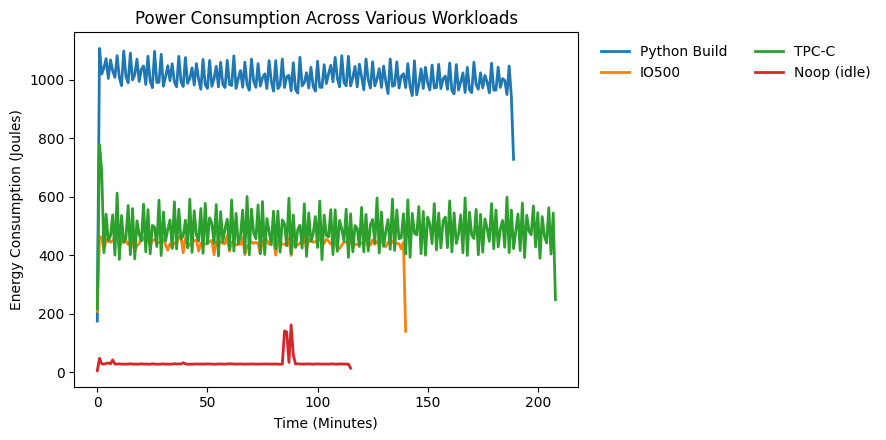

In [66]:
cols = ["Python Energy per Minute", "IO500 Energy per Minute", "TPCC Energy per Minute", "Noop Energy per Minute"]

# Legend labels
labels = ["Python Build", "IO500", "TPC-C", "Noop (idle)"]

style_map = get_workload_style_map(cols)

# Line Chart: Aggregate Data
fig, ax = plt.subplots(figsize=(9, 4.5))

df_minute = df.iloc[:df['Time (Minute)'].count()]
x = np.arange(len(df_minute))

for col, label in zip(cols, labels):
    style = style_map[col]
    ax.plot(
        x,
        df_minute[col],
        label=label,
        color=style["color"],
        # marker=style["marker"],
        # markevery=10,
        # markersize=3,
        linewidth=2.0,
    )

step = 50
ax.set_xticks(range(0, len(df_minute), step))
ax.set_xticklabels(range(0, len(df_minute), step))

ax.set_xlabel("Time (Minutes)")
ax.set_ylabel("Energy Consumption (Joules)")
ax.set_title("Power Consumption Across Various Workloads")

ax.legend(ncol=2, frameon=False, bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
fig.savefig("images/power_consumption_minutes.png", bbox_inches='tight')
plt.show()

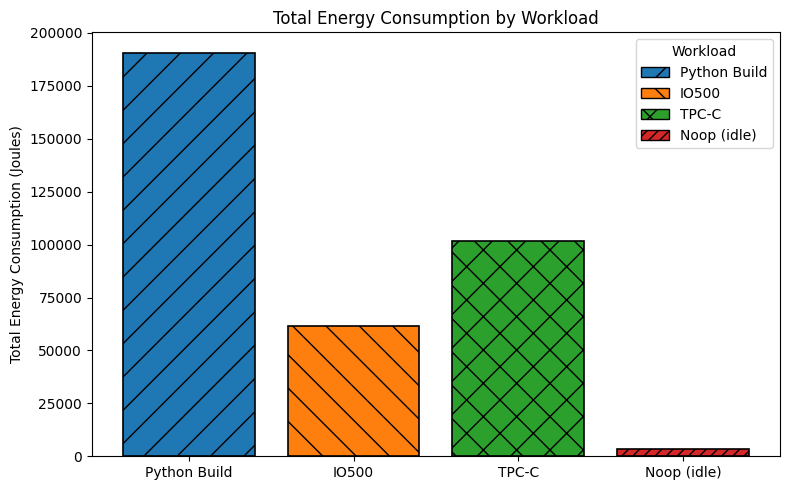

In [68]:
cols = ["Python Raw Energy (Joules)", "IO500 Raw Energy (Joules)", "TPCC Raw Energy (Joules)", "Noop Raw Energy (Joules)"]
labels = ["Python Build", "IO500", "TPC-C", "Noop (idle)"]

base_colors = [python_color, io500_color, tpcc_color, noop_color]
hatches = ["/", "\\", "x", "///"]

sums = df[cols].sum()

fig, ax = plt.subplots(figsize=(8, 5))

x = np.arange(len(cols))

bars = []
for i, (col, label) in enumerate(zip(cols, labels)):
    b = ax.bar(
        x[i],
        sums[col],
        color=base_colors[i],
        hatch=hatches[i],
        edgecolor="black",
        linewidth=1.2,
    )
    bars.append(b)

# Axis labels and title
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel("Total Energy Consumption (Joules)")
ax.set_title("Total Energy Consumption by Workload")

# Create legend using proxy artists
legend_patches = [
    matplotlib.patches.Patch(
        facecolor=base_colors[i],
        hatch=hatches[i],
        edgecolor="black",
        label=labels[i]
    )
    for i in range(len(cols))
]

ax.legend(handles=legend_patches, title="Workload", frameon=True)

plt.tight_layout()
fig.savefig("images/total_consumption.png", bbox_inches='tight')
plt.show()